# Market Paydays

Extracted three months of payment information from analytics.adyen_payment_log table


SQL code:

SELECT *
FROM analytics.adyen_payment_log
WHERE event_datetime BETWEEN CURDATE() - INTERVAL 3 MONTH AND CURDATE();


SET @ref_date = DATE(CURDATE()) - INTERVAL 3 MONTH;



SELECT @ref_date;

SELECT MAX(adyen_id)
FROM analytics.adyen_payment_log
WHERE event_datetime BETWEEN @ref_date - INTERVAL 3 MONTH AND @ref_date;

SELECT *
FROM analytics.adyen_payment_log
WHERE event_datetime BETWEEN @ref_date - INTERVAL 3 MONTH AND @ref_date;

SELECT MIN(adyen_id)
FROM analytics.adyen_payment_log
WHERE event_datetime BETWEEN @ref_date - INTERVAL 3 MONTH AND @ref_date;

SET @ref_date = DATE(@ref_date) - INTERVAL 3 MONTH;



In [1]:
import pandas as pd   
import numpy as np    
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loaded into a dataframe

df = pd.read_csv("./analytics_adyen_payment_log.csv")
df.event_datetime = pd.to_datetime(df.event_datetime )
df.head(3)

,adyen_id,user_id,country_id,check_out_id,sub_id_at_check_out,amount_type,amount_value,amount_currency,type,event_code,...,shopper_interaction,card_summary,card_bin,network_token,issuer_country,payment_method_variant,three_d_offered,three_d_offered_response,three_d_authenticated,three_d_authenticated_response
0,14112667,16041083.0,138.0,43224218.0,20474827.0,1,7900,MXN,Subscription,AUTHORISATION,...,ContAuth,495.0,526777.0,NaN,MX,mcstandardcredit,0,NaN,0,NaN
1,14112668,372749.0,247.0,43224220.0,20474828.0,1,999,GBP,Subscription,AUTHORISATION,...,ContAuth,6784.0,492181.0,NaN,GB,visastandarddebit,0,NaN,0,NaN
2,14112669,5159185.0,246.0,43224219.0,20474829.0,1,999,GBP,Subscription,AUTHORISATION,...,ContAuth,8238.0,542195.0,NaN,GB,mcstandardcredit,0,NaN,0,NaN


In [3]:
#Extracting only dates from the datetime column and adding to a new column event_date
df['event_date'] =pd.to_datetime(df.event_datetime.dt.date)
df.head(3)

,adyen_id,user_id,country_id,check_out_id,sub_id_at_check_out,amount_type,amount_value,amount_currency,type,event_code,...,card_summary,card_bin,network_token,issuer_country,payment_method_variant,three_d_offered,three_d_offered_response,three_d_authenticated,three_d_authenticated_response,event_date
0,14112667,16041083.0,138.0,43224218.0,20474827.0,1,7900,MXN,Subscription,AUTHORISATION,...,495.0,526777.0,NaN,MX,mcstandardcredit,0,NaN,0,NaN,2023-04-24
1,14112668,372749.0,247.0,43224220.0,20474828.0,1,999,GBP,Subscription,AUTHORISATION,...,6784.0,492181.0,NaN,GB,visastandarddebit,0,NaN,0,NaN,2023-04-24
2,14112669,5159185.0,246.0,43224219.0,20474829.0,1,999,GBP,Subscription,AUTHORISATION,...,8238.0,542195.0,NaN,GB,mcstandardcredit,0,NaN,0,NaN,2023-04-24


In [4]:
#Extracting country names
coun = pd.read_csv("./analytics_dx_country.csv")
countries = ['Australia', 'Canada', 'South Africa', 'United States']

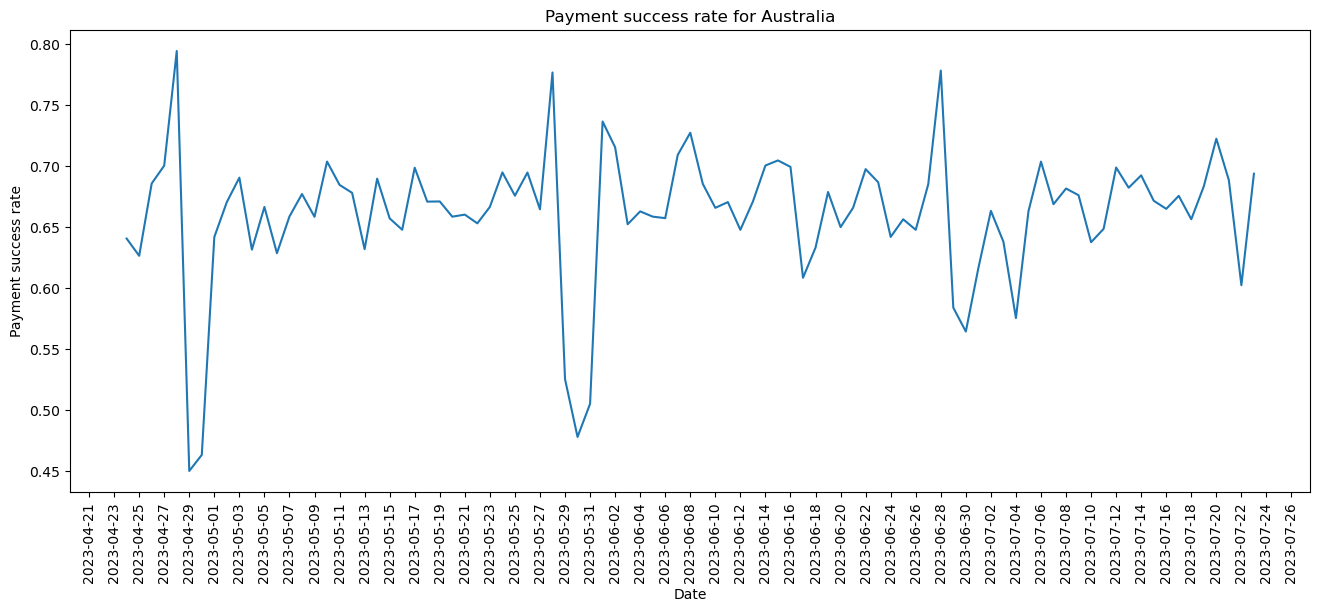

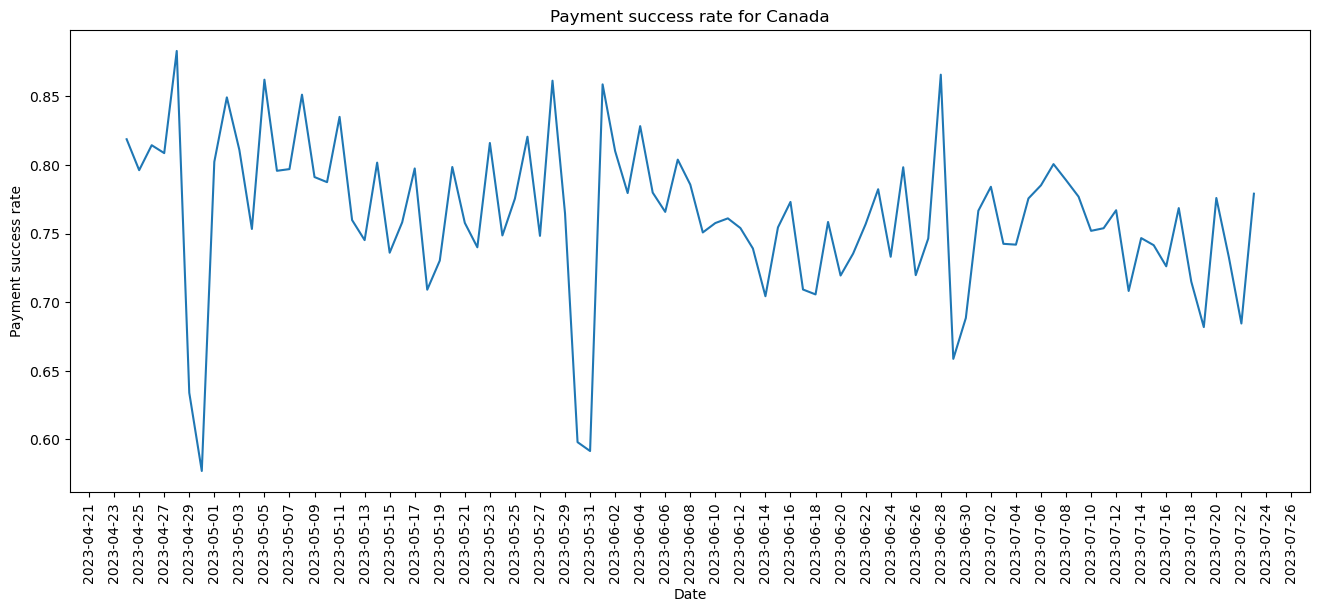

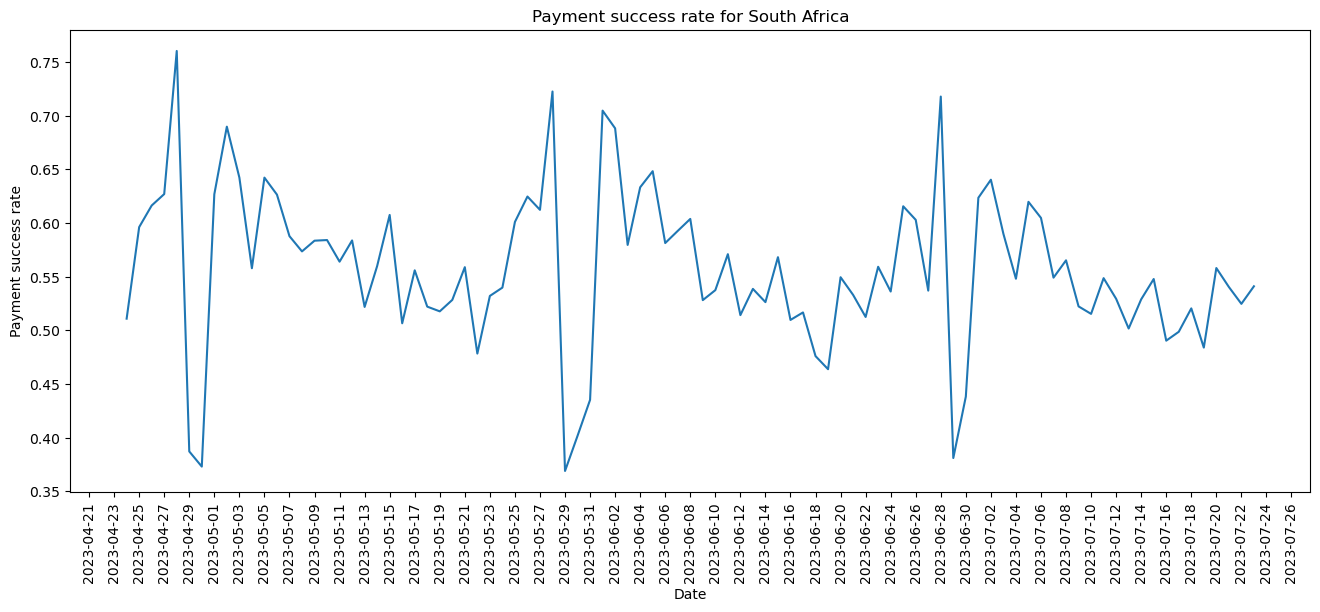

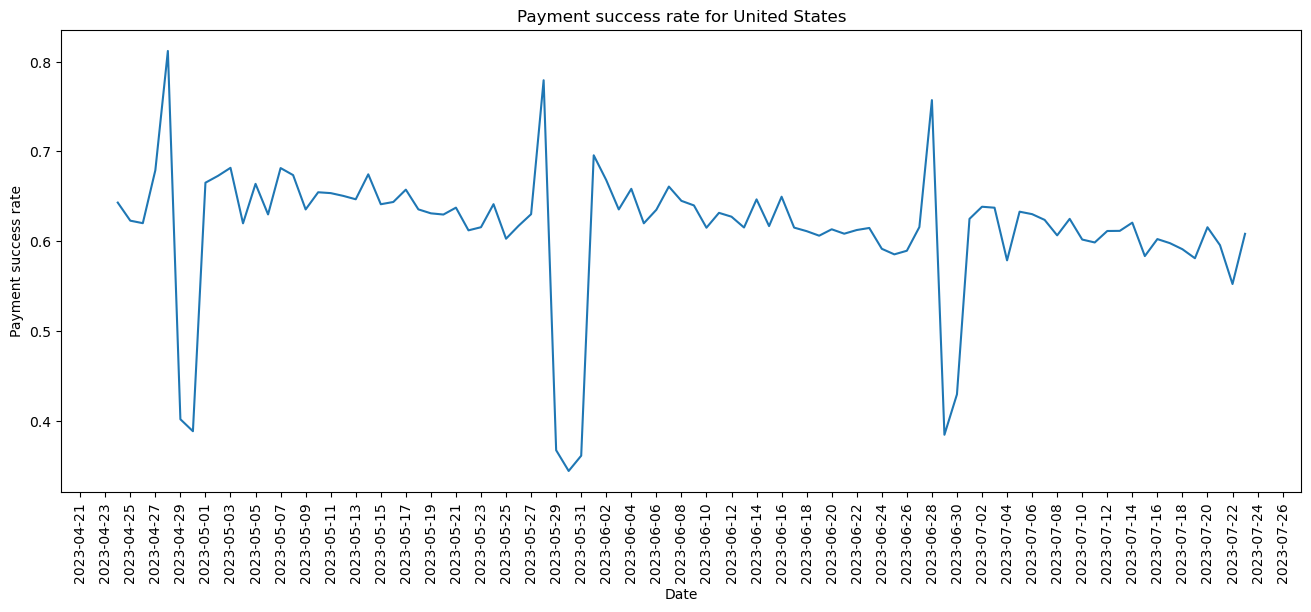

In [5]:
#Plotting percentage of successful payments out of all payments on a given day.
for country in countries:
    country_id = int(coun[coun['country'] == country]['country_id'])
    temp = df[df.country_id == country_id].groupby('event_date')['success'].mean().reset_index()
    chart,ax = plt.subplots(figsize = (16,6))
    chart = sns.lineplot(x = 'event_date', y = 'success', data= temp ).set(title = f"Payment success rate for {country}")
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    plt.xlabel('Date')
    plt.ylabel('Payment success rate')
    plt.xticks(rotation=90)
    #x_dates = temp['event_date'].dt.strftime('%d/%m')
    #ticks = ax.set_xticklabels(labels = x_dates, rotation = 90, horizontalalignment = 'right')

In [6]:
df['event_date'] == pd.to_datetime("2023-04-29").date()

0          False
1          False
2          False
3          False
4          False
           ...  
1764151    False
1764152    False
1764153    False
1764154    False
1764155    False
Name: event_date, Length: 1764156, dtype: bool

In [7]:
#Looking at reasons for the failed payments on 29/04 and 30/04 for Australia
#temp1 = df[df.country_id == 12]
temp1 = df[df['event_date'] == pd.to_datetime("2023-04-29").date()]
temp = df[(df.country_id == 12) & ((df.event_date == pd.to_datetime('2023-04-29').date()) | (df.event_date == pd.to_datetime('2023-04-30').date()))]
temp1   

,adyen_id,user_id,country_id,check_out_id,sub_id_at_check_out,amount_type,amount_value,amount_currency,type,event_code,...,card_summary,card_bin,network_token,issuer_country,payment_method_variant,three_d_offered,three_d_offered_response,three_d_authenticated,three_d_authenticated_response,event_date


In [8]:
df['event_date'][1] == pd.to_datetime("2023-04-24").date()
                 

True

In [9]:
df['event_code'].value_counts()

AUTHORISATION                     1757797
REFUND                               3654
REPORT_AVAILABLE                      801
NOTIFICATION_OF_FRAUD                 597
CHARGEBACK                            492
NOTIFICATION_OF_CHARGEBACK            464
INFORMATION_SUPPLIED                  133
CHARGEBACK_REVERSED                    68
CAPTURE_FAILED                         61
PREARBITRATION_LOST                    45
SECOND_CHARGEBACK                      18
PREARBITRATION_WON                     11
RECURRING_CONTRACT                      5
REFUND_FAILED                           3
REFUNDED_REVERSED                       2
REQUEST_FOR_INFORMATION                 2
DISPUTE_OPENED_WITH_CHARGEBACK          2
CAPTURE                                 1
Name: event_code, dtype: int64

# Year long data

In [10]:
# Extracted a year worth of data
df1 = pd.read_csv('./analytics_adyen_payment_log4.csv')
df2 = pd.read_csv('./analytics_adyen_payment_log3.csv')
df3 = pd.read_csv('./analytics_adyen_payment_log2.csv')
df4 = pd.read_csv('./analytics_adyen_payment_log1.csv')

# Concatenated the dataFrames vertically (row-wise)
year_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [11]:
year_df.event_datetime = pd.to_datetime(year_df.event_datetime )
year_df['event_date'] =pd.to_datetime(year_df.event_datetime.dt.date)

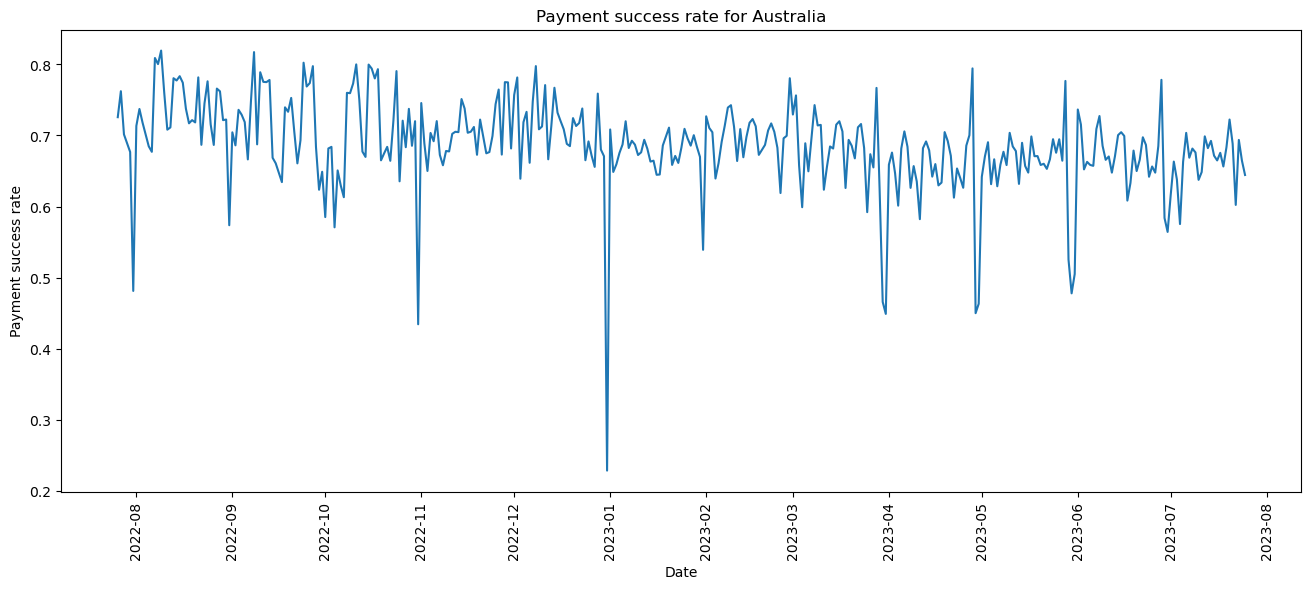

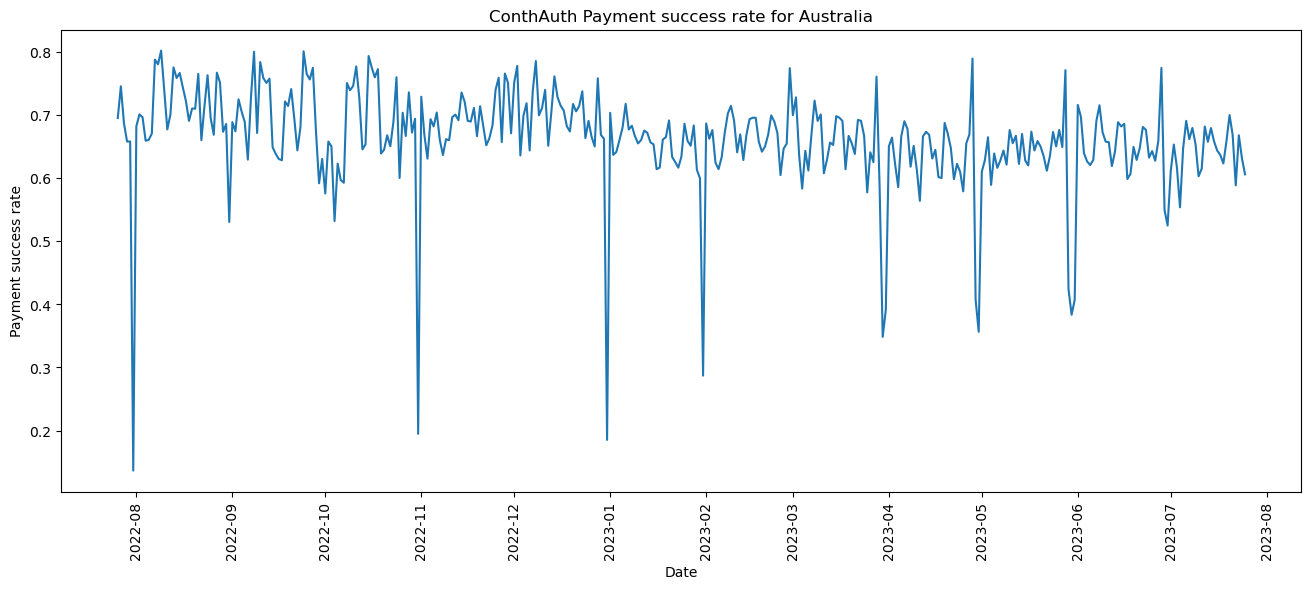

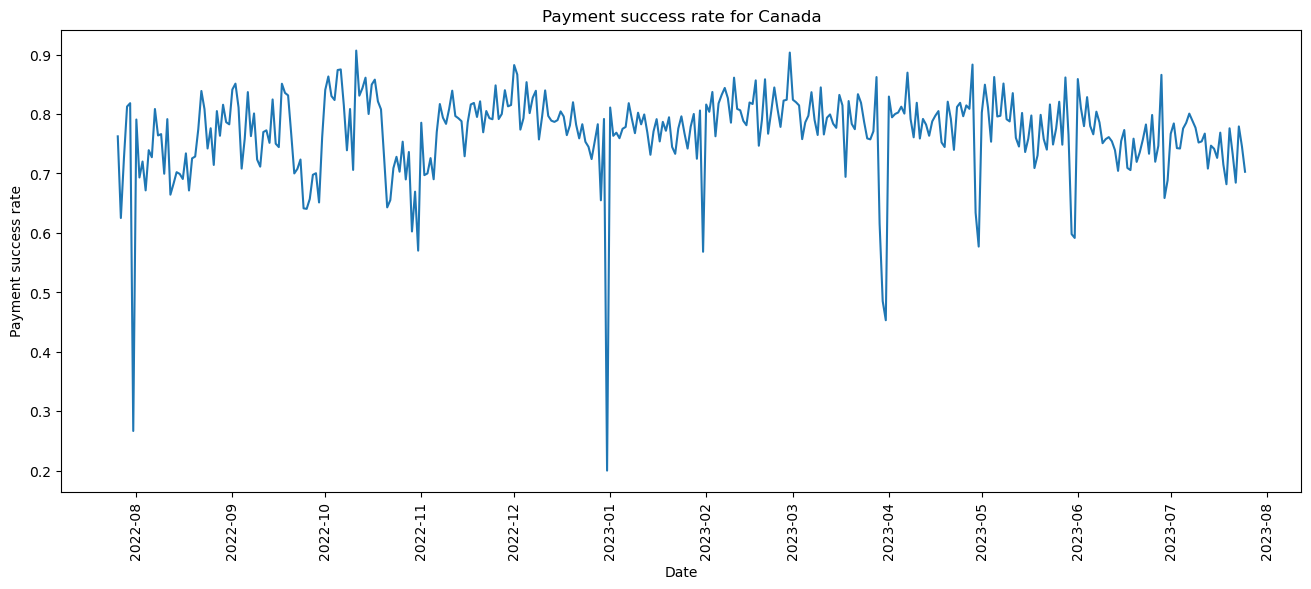

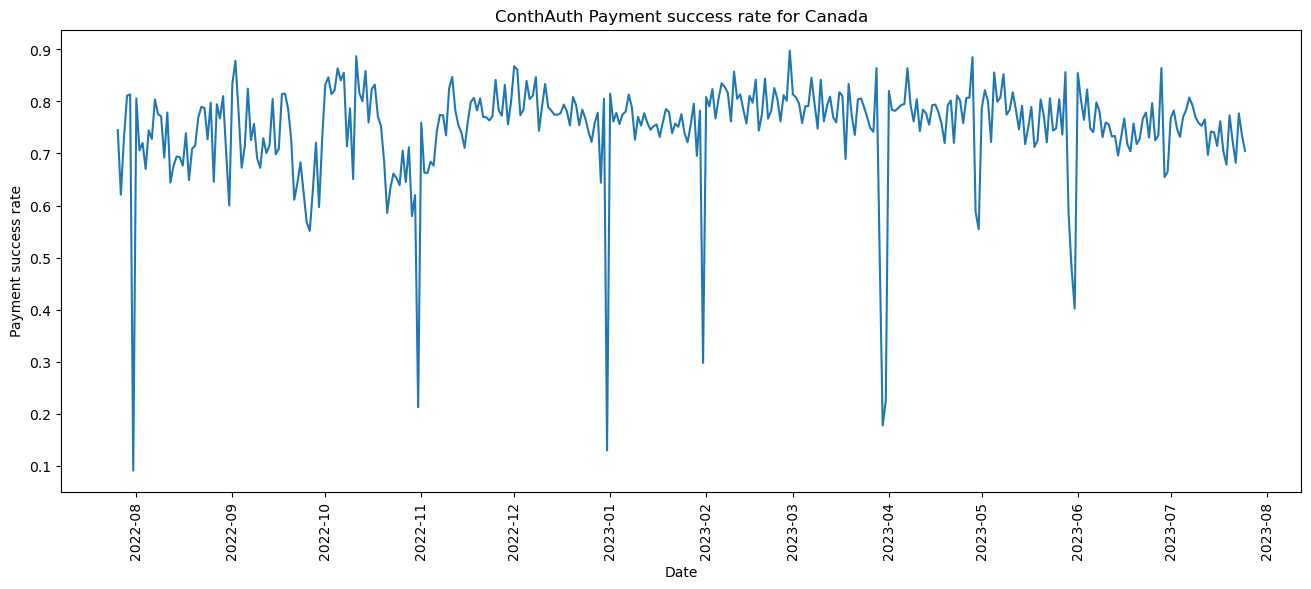

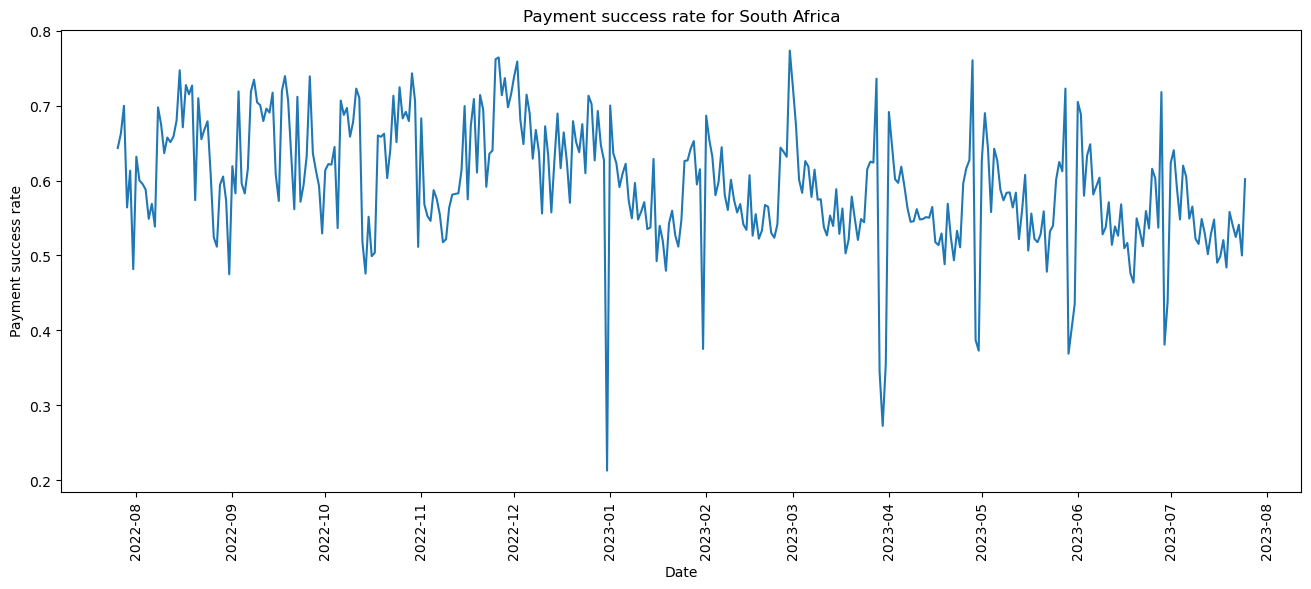

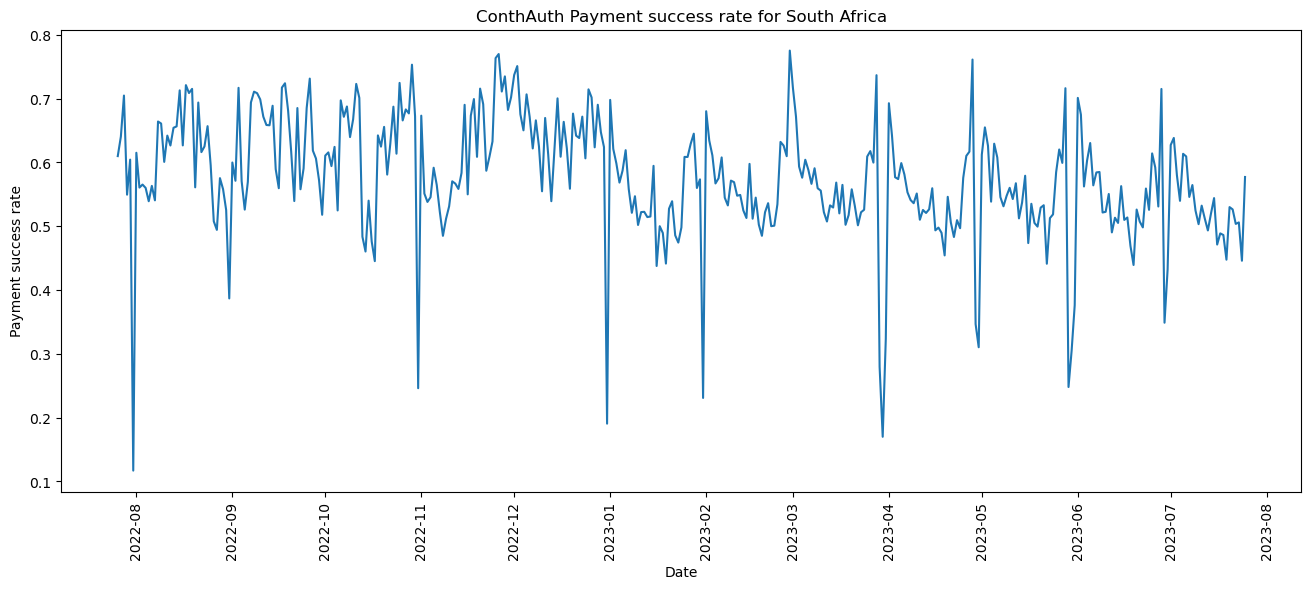

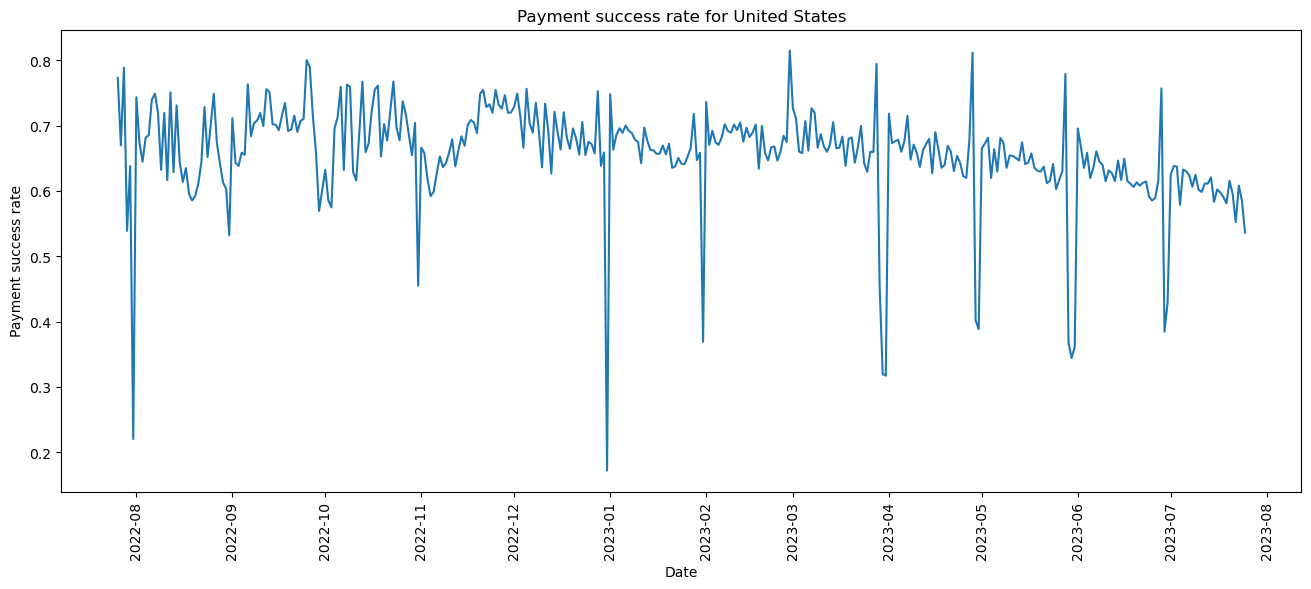

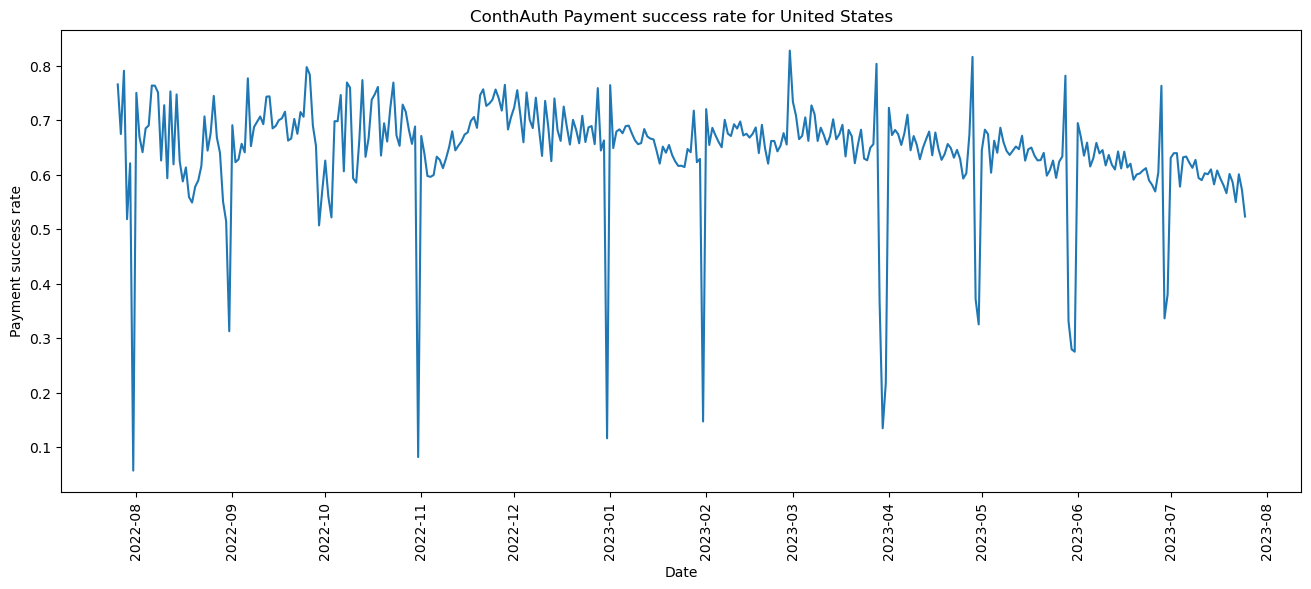

In [12]:
#Plotting percentage of successful payments out of all payments on a given day.
for country in countries:
    country_id = int(coun[coun['country'] == country]['country_id'])
    temp = year_df[year_df.country_id == country_id].groupby('event_date')['success'].mean().reset_index()
    chart,ax = plt.subplots(figsize = (16,6))
    chart = sns.lineplot(x = 'event_date', y = 'success', data= temp ).set(title = f"Payment success rate for {country}")
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.xlabel('Date')
    plt.ylabel('Payment success rate')
    plt.xticks(rotation=90)
    temp = year_df[(year_df.country_id == country_id) & (year_df.shopper_interaction == 'ContAuth')].groupby('event_date')['success'].mean().reset_index()
    chart,ax = plt.subplots(figsize = (16,6))
    chart = sns.lineplot(x = 'event_date', y = 'success', data= temp ).set(title = f"ConthAuth Payment success rate for {country}")
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.xlabel('Date')
    plt.ylabel('Payment success rate')
    plt.xticks(rotation=90)

In [13]:
#89.66% of the payments are ContAuth    
year_df['shopper_interaction'].value_counts()

ContAuth     5797505
Ecommerce     668103
Name: shopper_interaction, dtype: int64

# Reasons for dips

In [92]:
# Filtered data to look at the reasons for major dips in the above plots

for country in countries:
    country_id = int(coun[coun['country'] == country]['country_id'])
    temp = year_df[year_df.country_id == country_id].groupby('event_date')['success'].mean().reset_index()
    filtered_df = year_df[(year_df['event_date'].isin(temp[temp['success'] < 0.5]['event_date'])) & (year_df['success'] == False) & (year_df.country_id == country_id)]
    print(f"Top five reasons for failed transactions during the dips in {country} : ")
    print(filtered_df['reason_raw'].value_counts().head(5))
    print("\n")

Top five reasons for failed transactions during the dips in Australia : 
51 : Insufficient funds/over credit limit    2642
82 : Policy                                   474
79 : Life cycle                               265
05 : Do not honor                             218
59 : Suspected fraud                          161
Name: reason_raw, dtype: int64


Top five reasons for failed transactions during the dips in Canada : 
51 : Insufficient funds/over credit limit    88
59 : Suspected fraud                         13
04 : Capture card                            10
82 : Policy                                  10
79 : Life cycle                               9
Name: reason_raw, dtype: int64


Top five reasons for failed transactions during the dips in South Africa : 
51 : Insufficient funds/over credit limit    4861
05 : Do not honor                             550
82 : Policy                                   462
54 : Expired card                             390
61 : Exceeds withdrawal a

In [64]:
#Reasons on other days
for country in countries:
    country_id = int(coun[coun['country'] == country]['country_id'])
    temp = year_df[year_df.country_id == country_id].groupby('event_date')['success'].mean().reset_index()
    filtered_df = year_df[(year_df['event_date'].isin(temp[temp['success'] > 0.5]['event_date'])) & (year_df['success'] == False) & (year_df.country_id == country_id)]
    print(f"Top five reasons for failed transactions in {country} : ")
    print(filtered_df['reason_raw'].value_counts().head(5))
    print("\n")

Top five reasons for failed transactions in Australia : 
51 : Insufficient funds/over credit limit    141443
82 : Policy                                   20743
79 : Life cycle                               16184
05 : Do not honor                             10042
41 : Lost card                                 8636
Name: reason_raw, dtype: int64


Top five reasons for failed transactions in Canada : 
51 : Insufficient funds/over credit limit    9060
79 : Life cycle                              2232
59 : Suspected fraud                         1442
04 : Capture card                            1256
54 : Expired card                             877
Name: reason_raw, dtype: int64


Top five reasons for failed transactions in South Africa : 
51 : Insufficient funds/over credit limit    52300
05 : Do not honor                             6224
82 : Policy                                   4804
54 : Expired card                             4230
61 : Exceeds withdrawal amount limit          422

# Daily seasonality

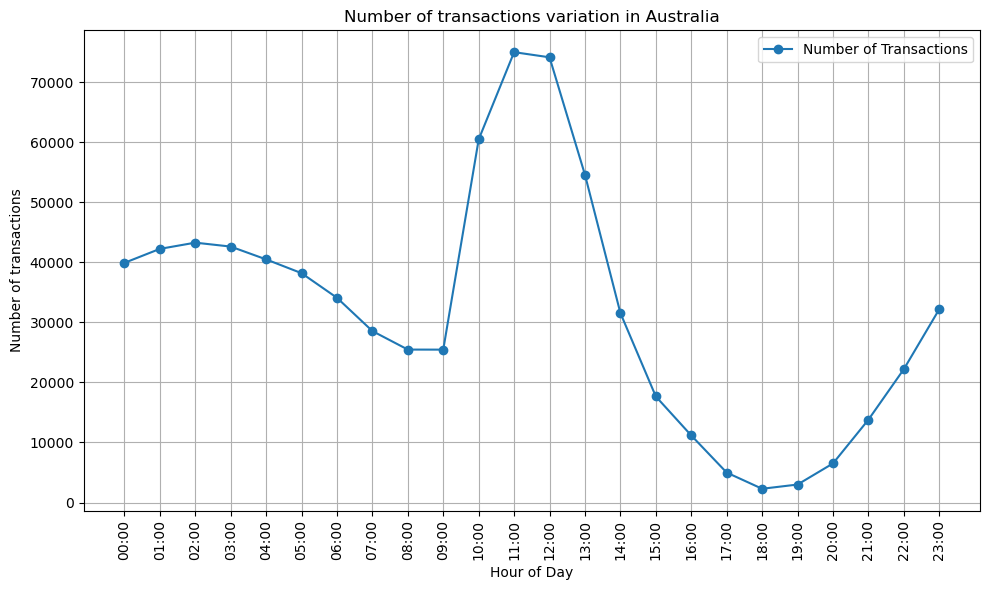

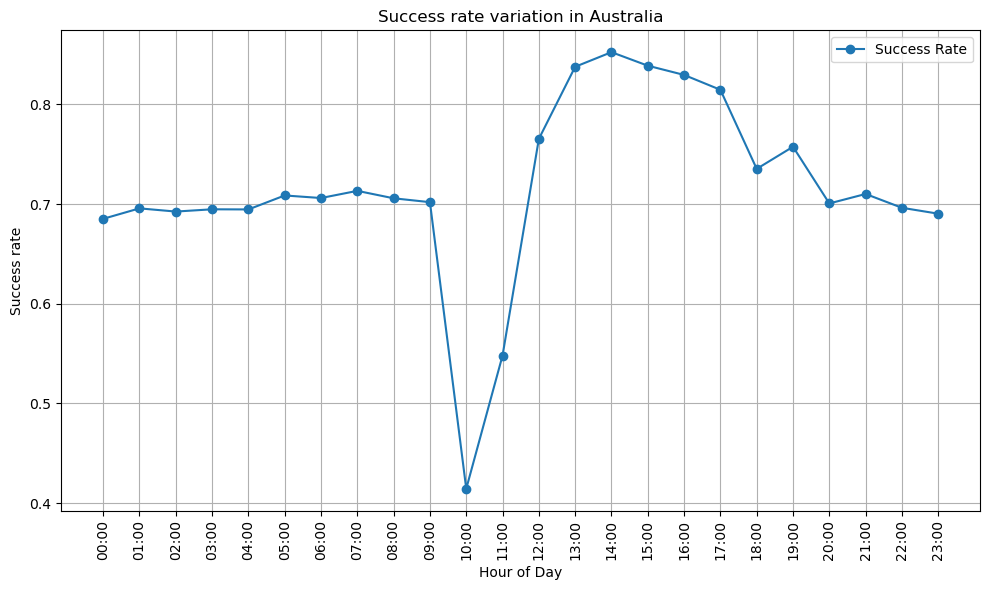

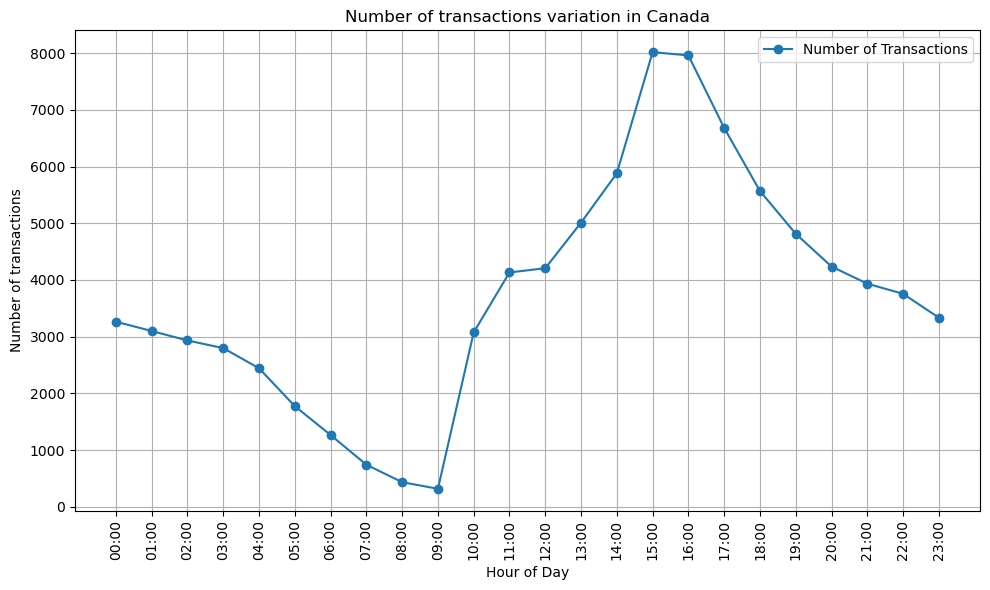

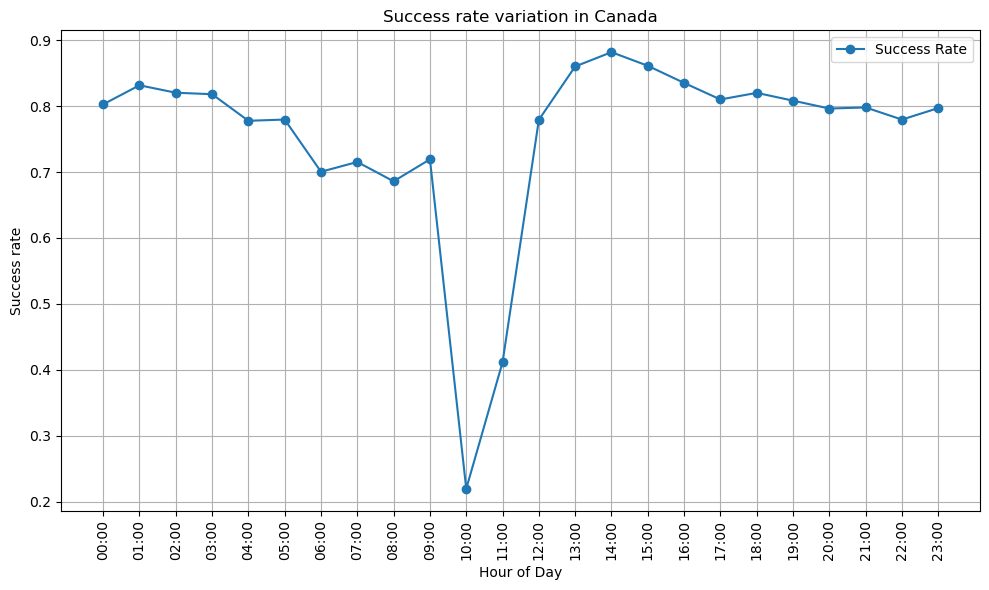

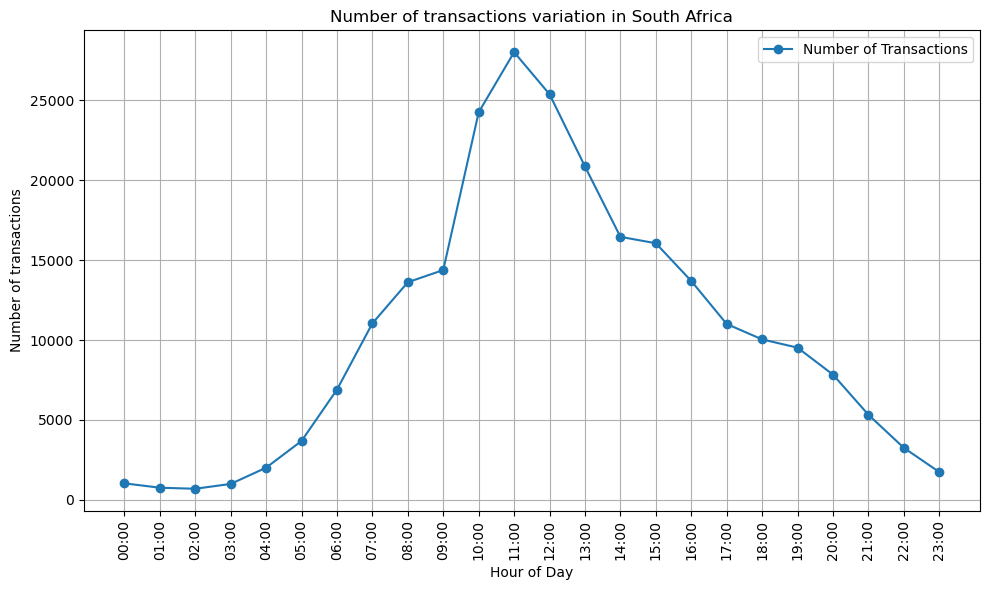

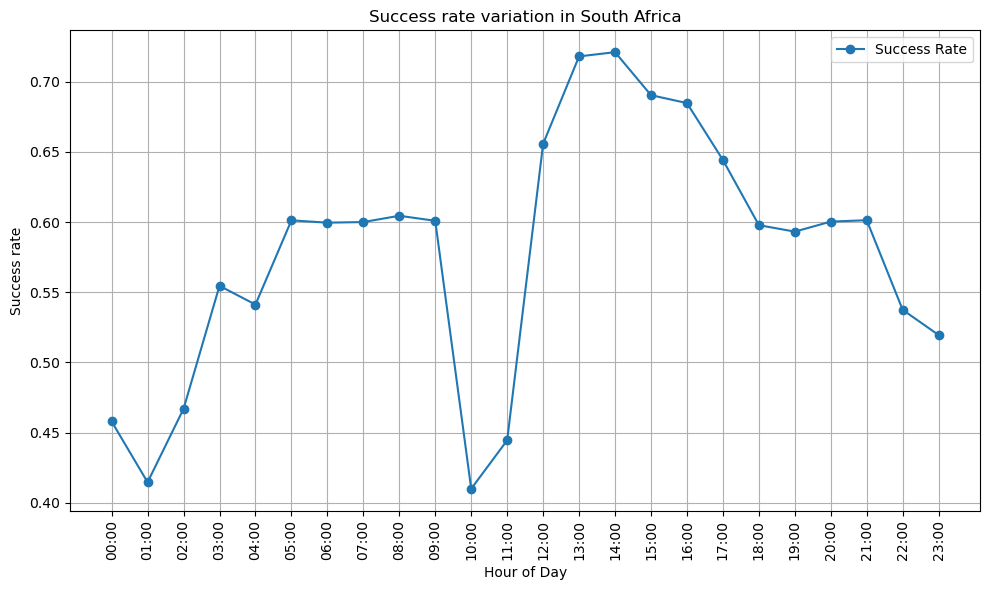

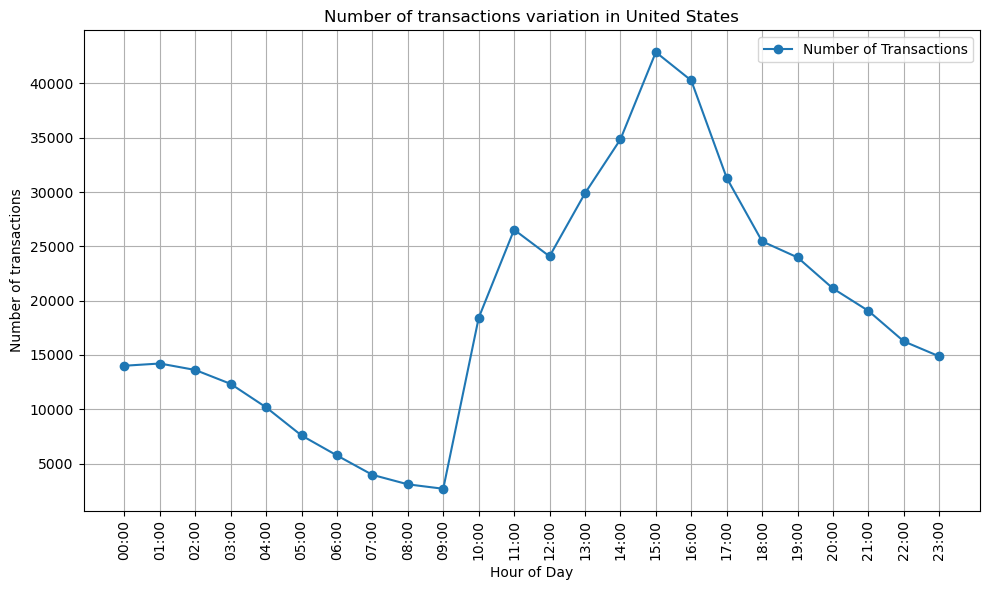

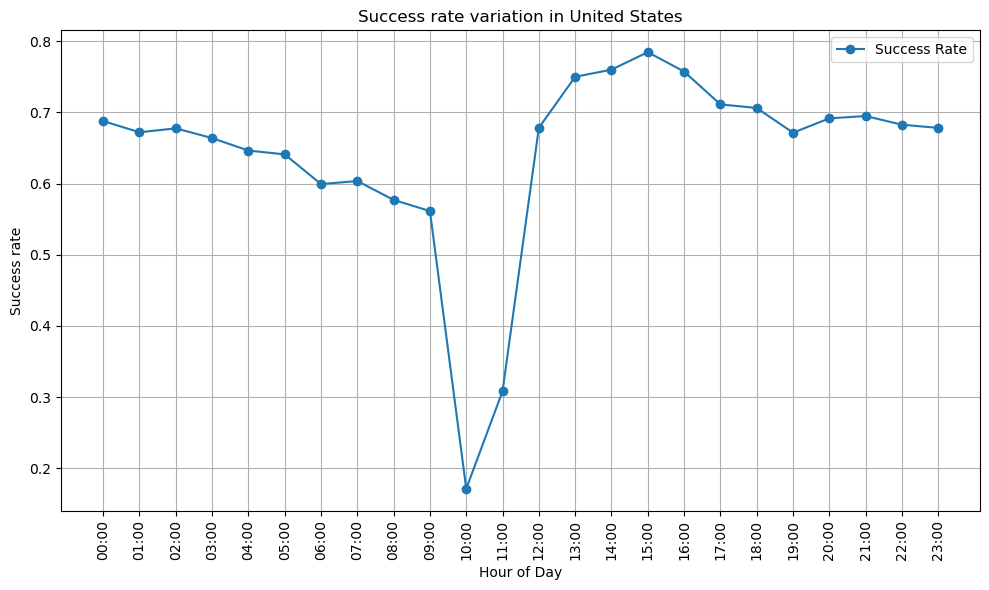

In [75]:

#Daily seasonality

#Extracted hour from 'event_datetime' column
year_df['hour'] = year_df['event_datetime'].dt.hour

#Grouped by Country and Time of Day to calculate metrics
metrics_df = year_df.groupby(['country_id', 'hour']).agg({
    'adyen_id': 'count',              # Number of transactions
    'success': 'mean',                # Success rate (proportion of successful transactions)
}).reset_index()

#Renamed the columns for clarity
metrics_df.columns = ['country_id', 'hour', 'num_transactions', 'success_rate']

#Plotted the Metrics for each country
for country in countries:

    country_id = int(coun[coun['country'] == country]['country_id'])
    country_data = metrics_df[metrics_df['country_id'] == country_id]

    #Plot for number of trasactions
    plt.figure(figsize=(10, 6))
    plt.plot(country_data['hour'], country_data['num_transactions'], label='Number of Transactions', marker='o', linestyle='-')
    #plt.plot(country_data['hour'], country_data['success_rate'], label='Success Rate', marker='o', linestyle='-')

    plt.xlabel('Hour of Day')
    plt.ylabel('Number of transactions')
    plt.title(f'Number of transactions variation in {country}')
    plt.xticks(range(24), labels=[f'{h:02d}:00' for h in range(24)])  # Displayed hours in 24-hour format
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    #Plot for success rate of the transactions
    plt.figure(figsize=(10, 6))
    #plt.plot(country_data['hour'], country_data['num_transactions'], label='Number of Transactions', marker='o', linestyle='-')
    plt.plot(country_data['hour'], country_data['success_rate'], label='Success Rate', marker='o', linestyle='-')

    plt.xlabel('Hour of Day')
    plt.ylabel('Success rate')
    plt.title(f'Success rate variation in {country}')
    plt.xticks(range(24), labels=[f'{h:02d}:00' for h in range(24)])  # Displayed hours in 24-hour format
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Number of transactions throughout the year

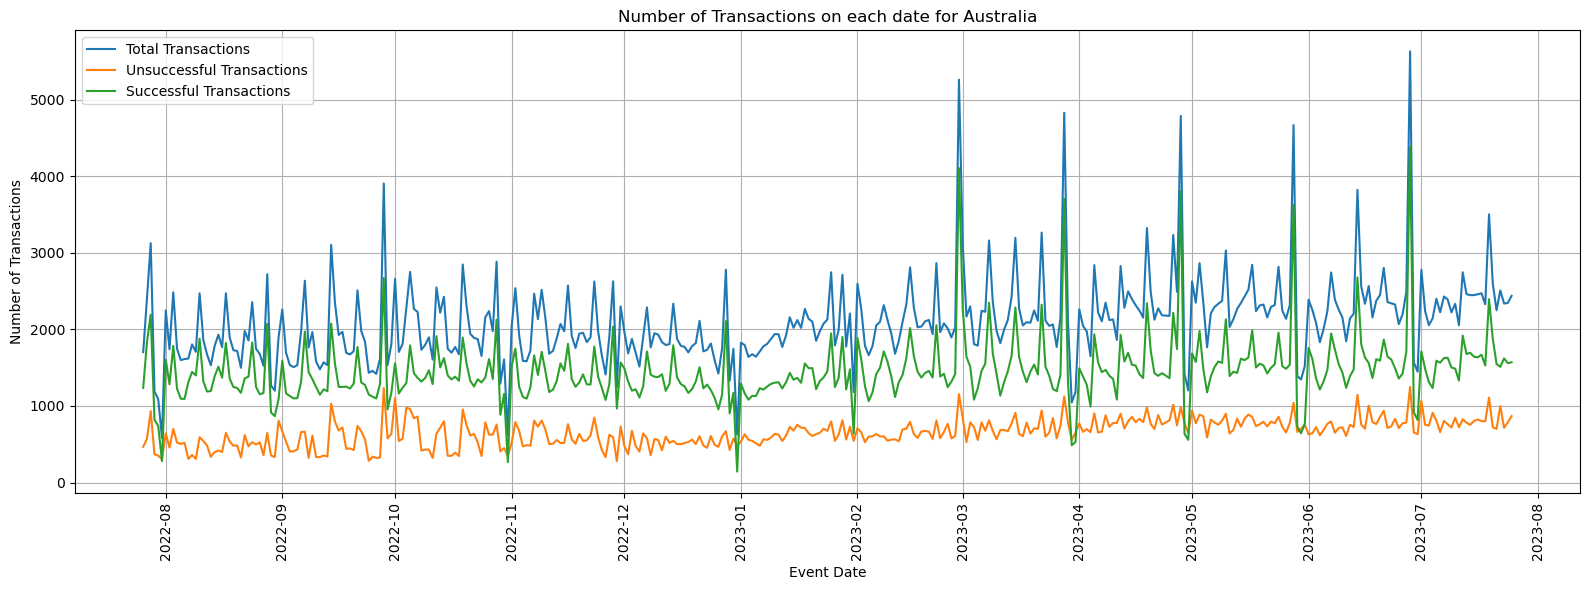

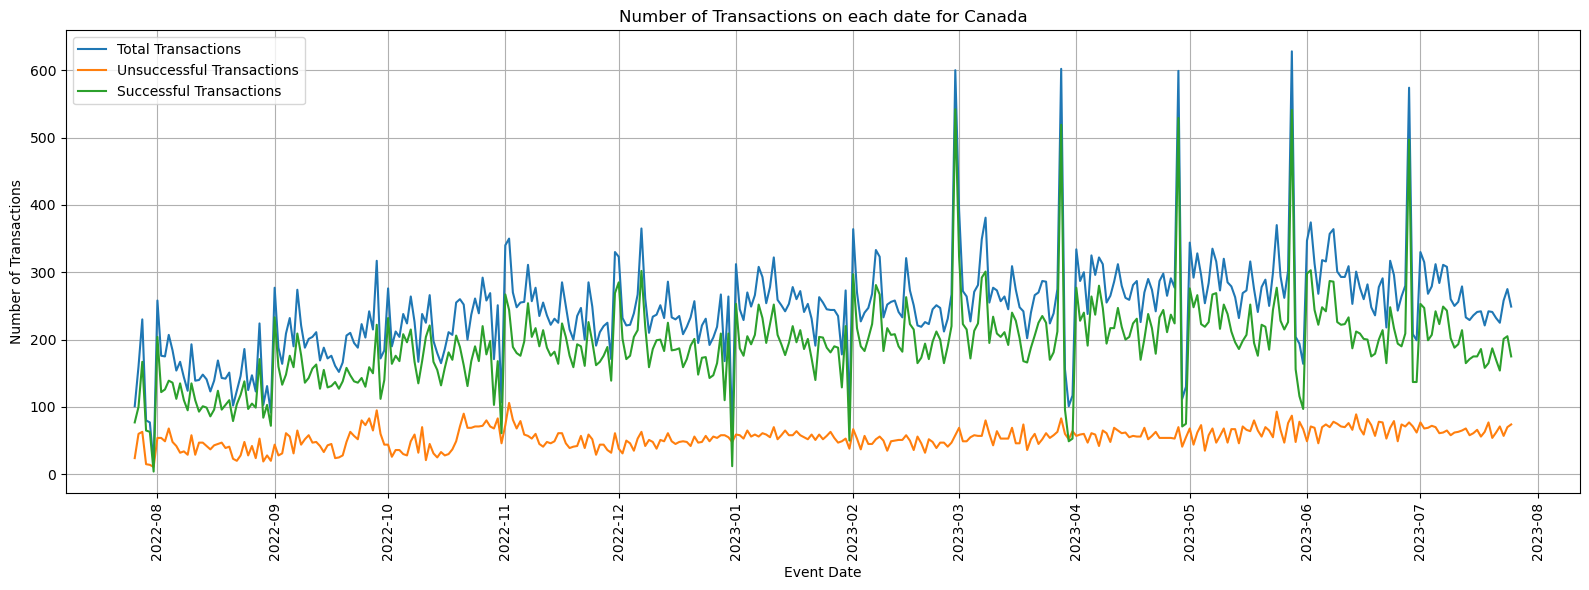

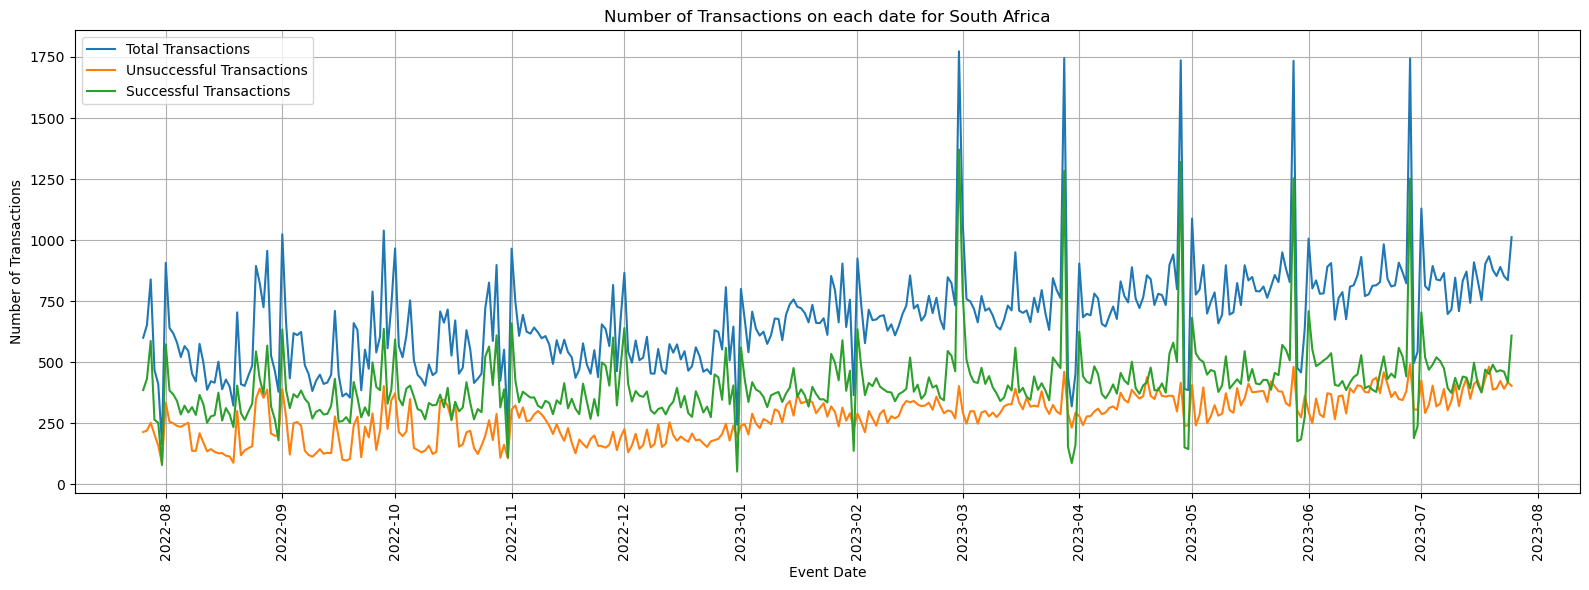

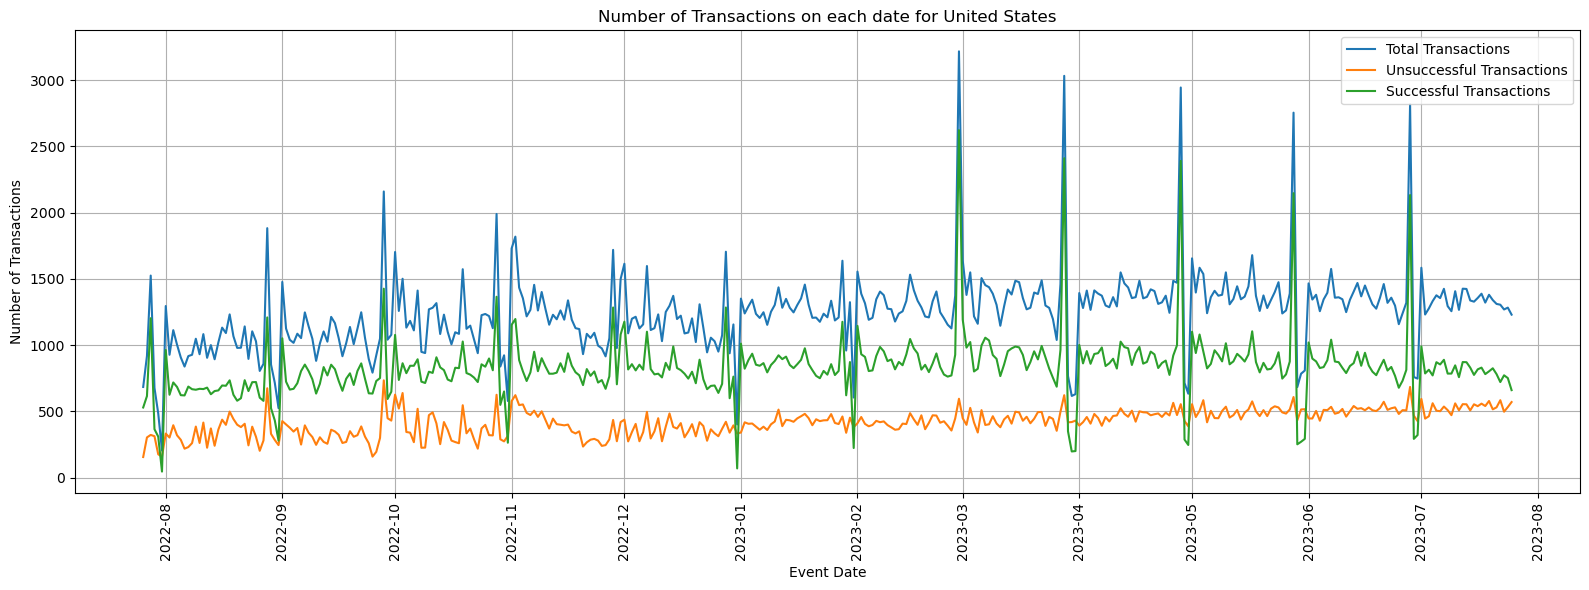

In [84]:
for country in countries:
    
    country_id = int(coun[coun['country'] == country]['country_id'])
    
    transactions_per_date = year_df[year_df.country_id == country_id].groupby('event_date')['adyen_id'].count().reset_index()
    success_counts = year_df[year_df.country_id == country_id].groupby(['event_date', 'success'])['adyen_id'].count().unstack().reset_index()

    # Merge the success counts with the transactions_per_date DataFrame
    transactions_per_date = transactions_per_date.merge(success_counts, on='event_date', how='left')

    # Rename the columns for clarity
    transactions_per_date.columns = ['event_date', 'num_transactions', 'Unsuccessful', 'Successful']

    # Plot the data on a single line graph
    chart,ax = plt.subplots(figsize = (16,6))

    plt.plot(transactions_per_date['event_date'], transactions_per_date['num_transactions'], label='Total Transactions')
    plt.plot(transactions_per_date['event_date'], transactions_per_date['Unsuccessful'], label='Unsuccessful Transactions')
    plt.plot(transactions_per_date['event_date'], transactions_per_date['Successful'], label='Successful Transactions')
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.xlabel('Event Date')
    plt.ylabel('Number of Transactions')
    plt.title(f'Number of Transactions on each date for {country}')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()







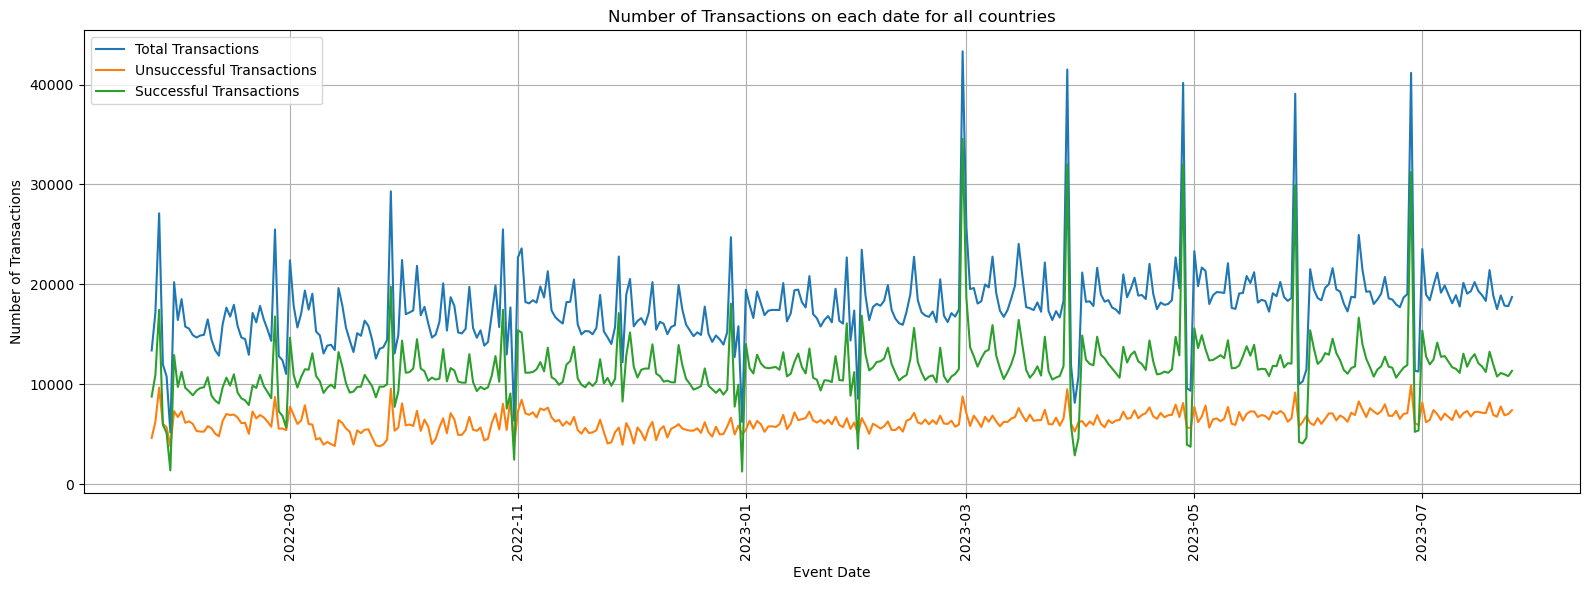

In [91]:
transactions_per_date = year_df.groupby('event_date')['adyen_id'].count().reset_index()

success_counts = year_df.groupby(['event_date', 'success'])['adyen_id'].count().unstack().reset_index()

# Merge the success counts with the transactions_per_date DataFrame
transactions_per_date = transactions_per_date.merge(success_counts, on='event_date', how='left')

# Rename the columns for clarity
transactions_per_date.columns = ['event_date', 'num_transactions', 'Unsuccessful', 'Successful']

# Plot the data on a single line graph
plt.figure(figsize=(16, 6))

plt.plot(transactions_per_date['event_date'], transactions_per_date['num_transactions'], label='Total Transactions')
plt.plot(transactions_per_date['event_date'], transactions_per_date['Unsuccessful'], label='Unsuccessful Transactions')
plt.plot(transactions_per_date['event_date'], transactions_per_date['Successful'], label='Successful Transactions')

plt.xlabel('Event Date')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions on each date for all countries')
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Sub Roller behaviour

In [47]:
#Australia Sub roller behaviour

temp = year_df[(year_df.country_id == 12) & (year_df['event_date'].dt.day.isin([29, 30, 31])) ]
temp['success'].value_counts()

True     24621
False    16087
Name: success, dtype: int64